In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set()

In [2]:
cenarios_df = pd.read_csv("data/cenarios_expansao.csv")
faturamento_df = pd.read_csv("data/faturamento_lojas_atuais.csv")
lojas_df = pd.read_csv("data/lojas_atuais.csv")

In [3]:
lojas_df.head()

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
0,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.168922,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5300108005004,5300108,NaN,FEATURE_02_VALUE_03,True,22.00,FEATURE_05_VALUE_03,27,0.215967,...,1562.674817,3.670883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3550308005052,3550308,NaN,FEATURE_02_VALUE_03,True,45.66,FEATURE_05_VALUE_03,6,0.190102,...,5593.905463,2.815883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3145604003002,3145604,NaN,FEATURE_02_VALUE_04,False,30.00,FEATURE_05_VALUE_03,3,0.141988,...,12.824022,7.218132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1600303005010,1600303,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,False,62.49,FEATURE_05_VALUE_03,30,0.107619,...,325.531120,1.972944,FEATURE_11_VALUE_02,FEATURE_12_VALUE_01,100.0,88.1,100.0,100.0,88.5,93.8


In [4]:
faturamento_df.head()

,cod_loja,ano,mes,categoria,qtde,receita
0,1,2016,1,CATEG_01,301.0,9164.86
1,1,2016,2,CATEG_01,187.0,8175.55
2,1,2016,3,CATEG_01,242.0,10521.67
3,1,2016,4,CATEG_01,104.0,4560.91
4,1,2016,5,CATEG_01,100.0,4263.30


In [5]:
faturamento_df.shape

(1003094, 6)

In [6]:
df = faturamento_df.merge(lojas_df, left_on="cod_loja", right_on="cod_loja")
df["datetime"] = pd.to_datetime(df.ano*100 + df.mes, format='%Y%m')
df.drop(["ano", "mes"], axis=1, inplace=True)

df.head()

,cod_loja,categoria,qtde,receita,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,datetime
0,1,CATEG_01,301.0,9164.86,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
1,1,CATEG_01,187.0,8175.55,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-01
2,1,CATEG_01,242.0,10521.67,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-01
3,1,CATEG_01,104.0,4560.91,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-01
4,1,CATEG_01,100.0,4263.30,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-01


In [7]:
df.shape

(1003094, 25)

## Receita mes a mes

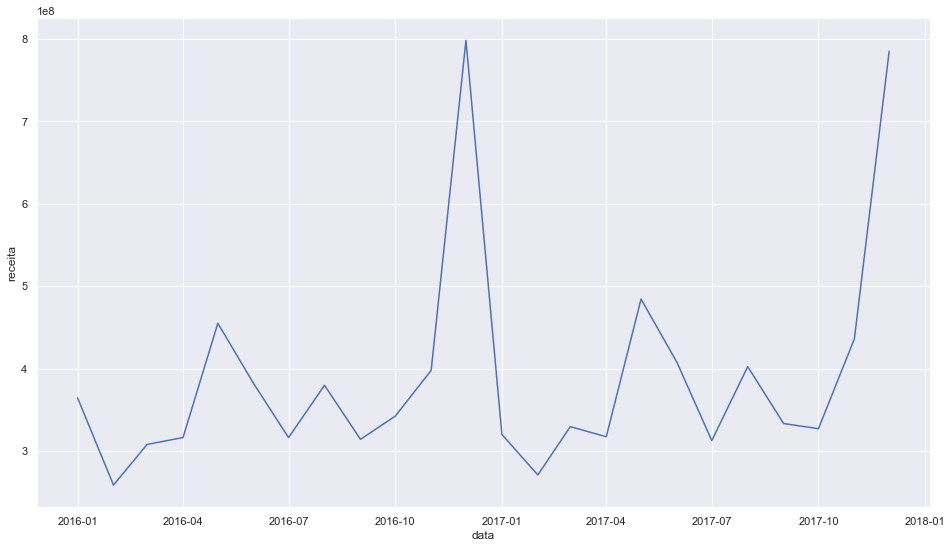

In [8]:
t = df[["datetime", "receita"]].groupby("datetime", as_index=False).sum()

plt.figure(figsize=(16,9))
plt.plot(t["datetime"], t["receita"])
plt.ylabel("receita")
plt.xlabel("data")
plt.show()

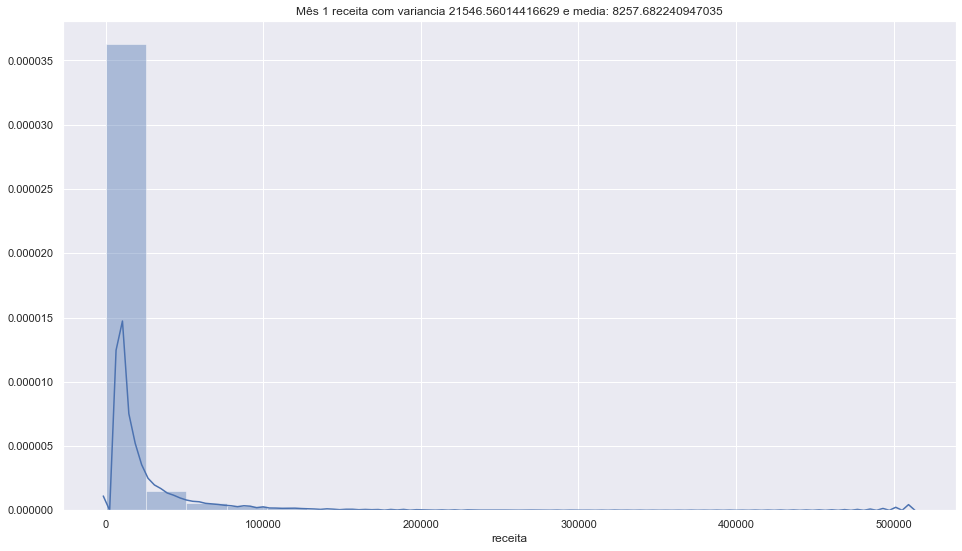

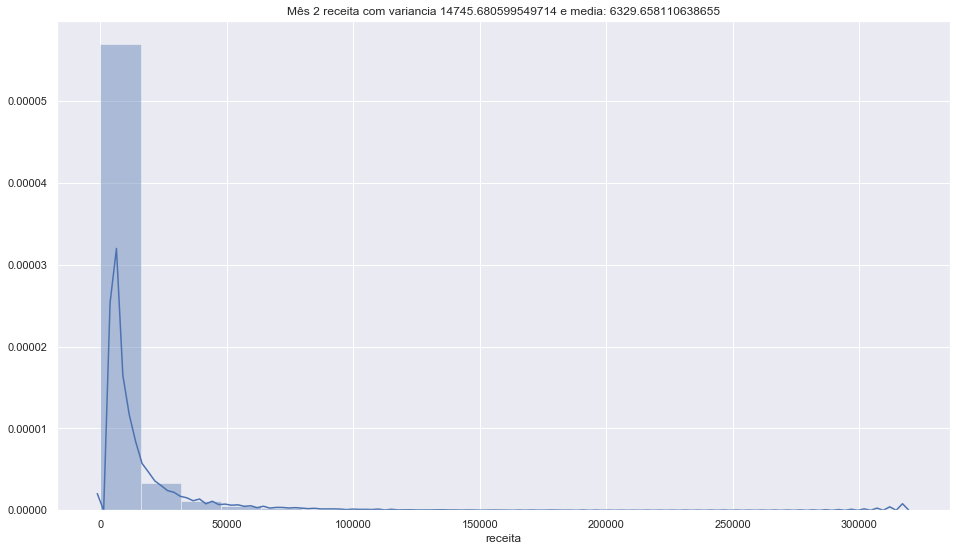

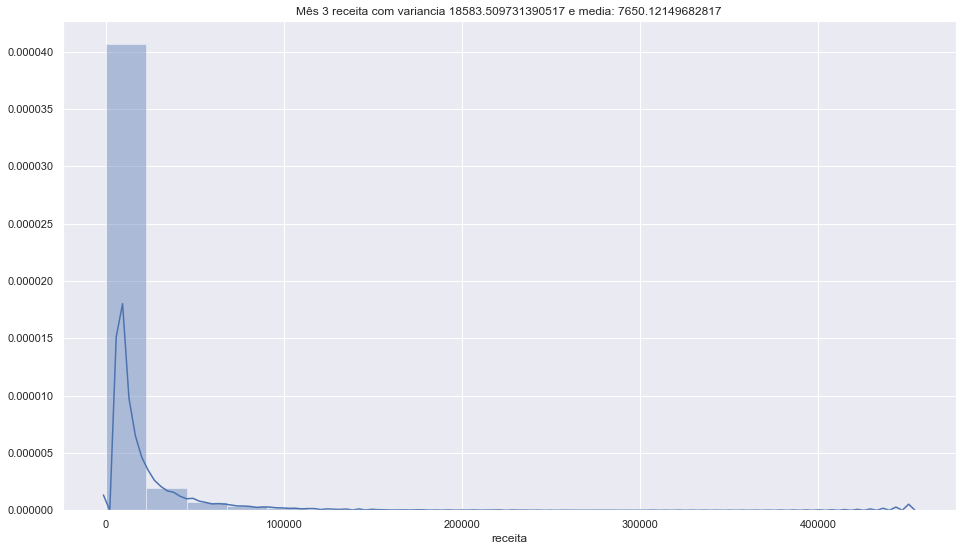

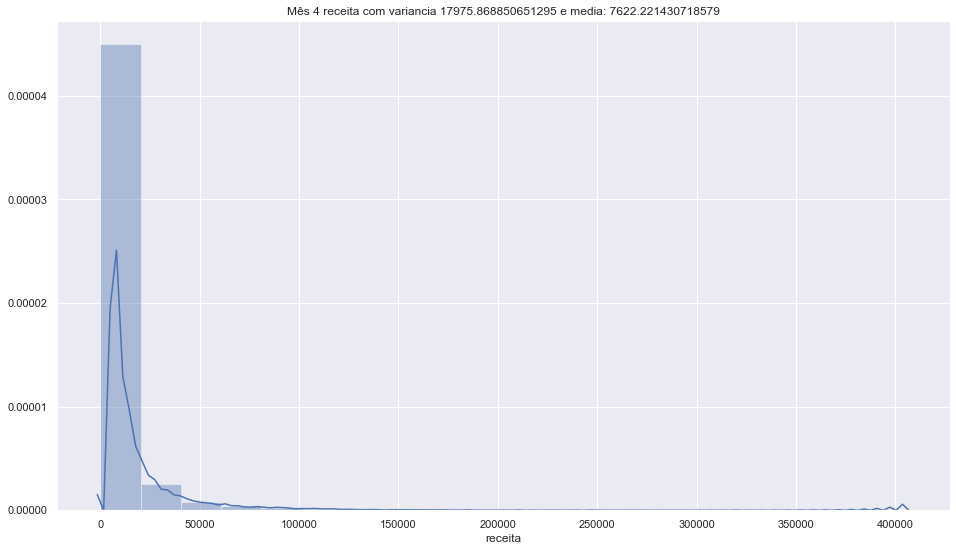

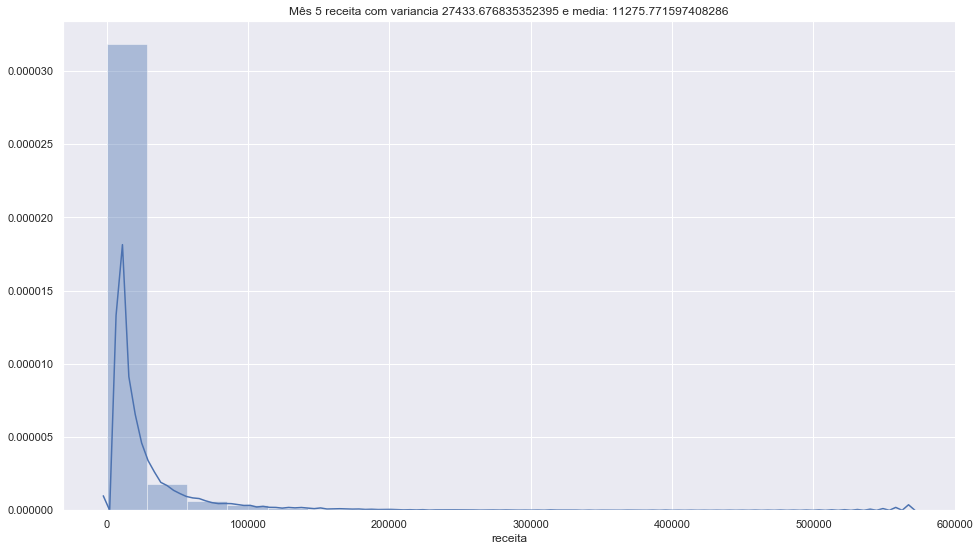

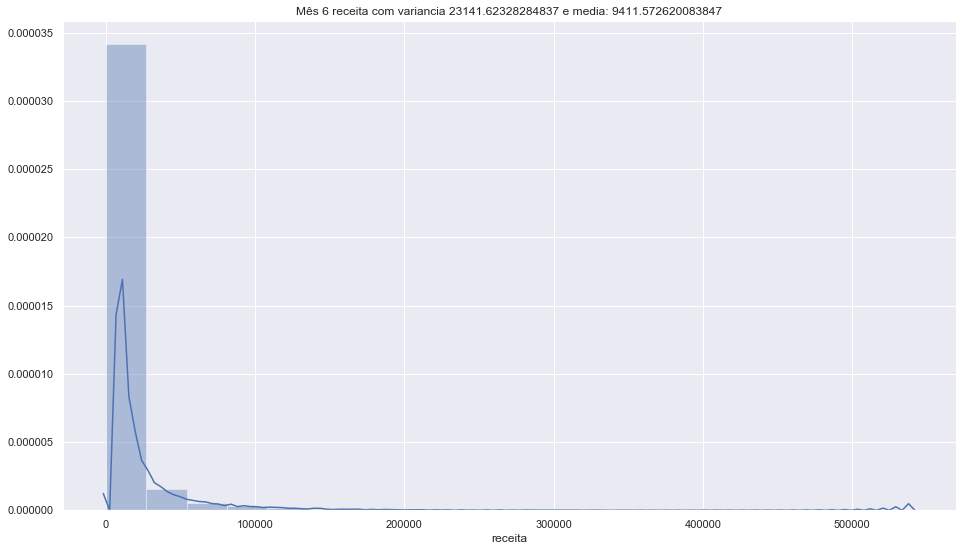

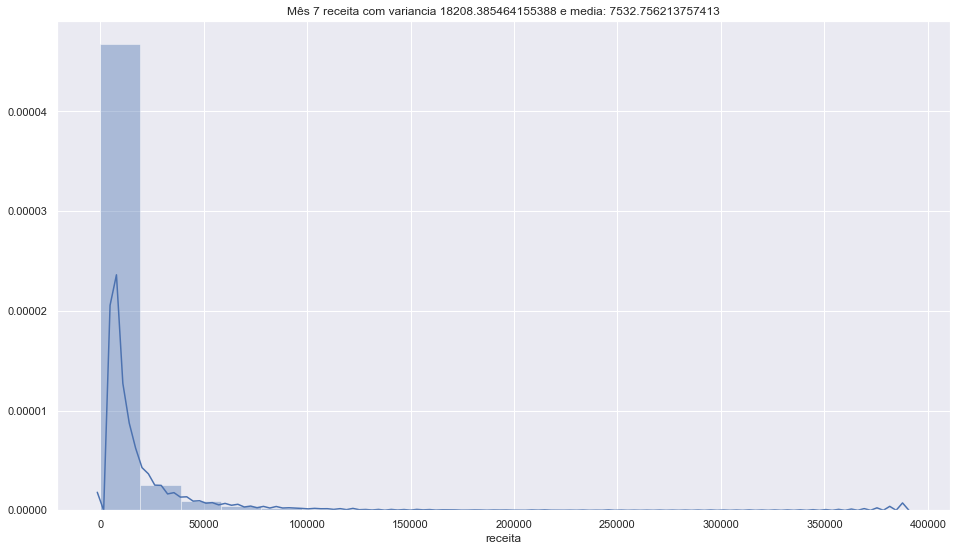

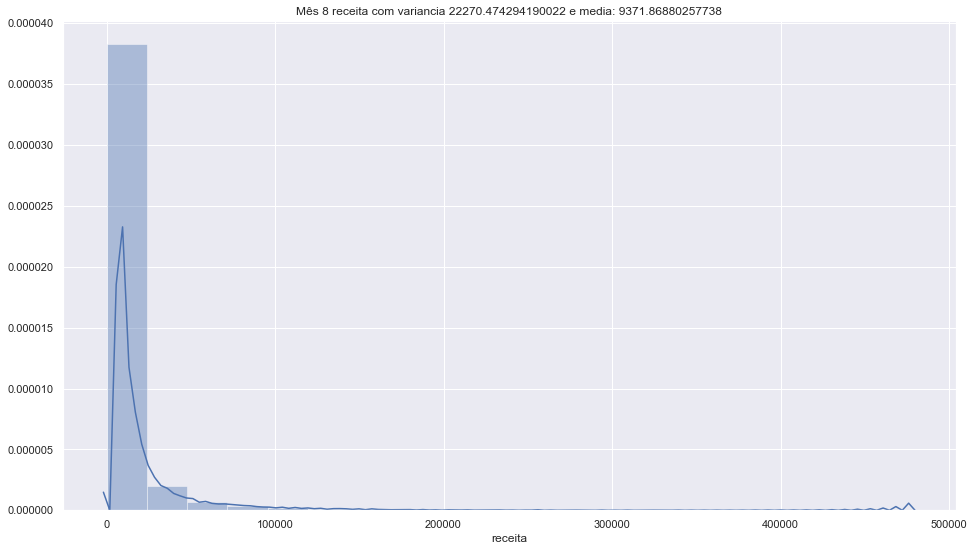

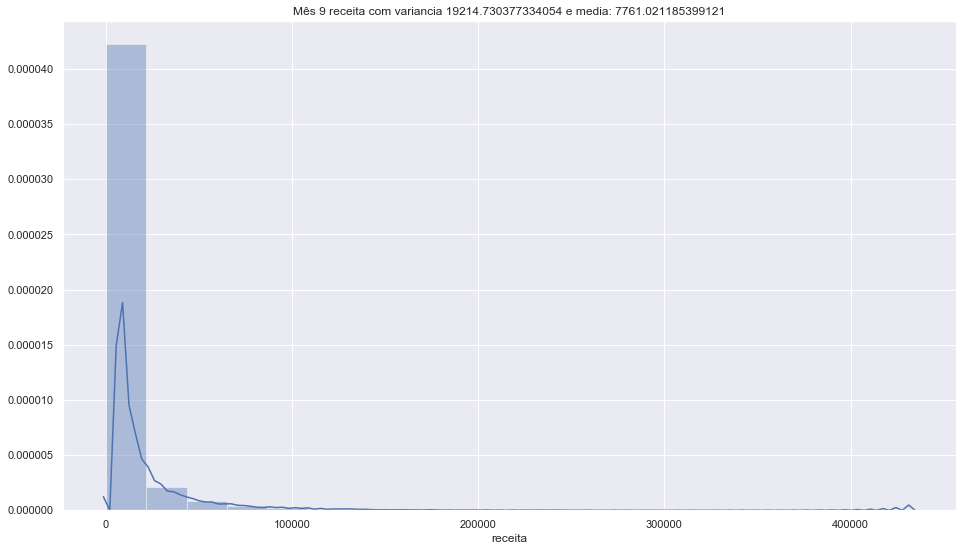

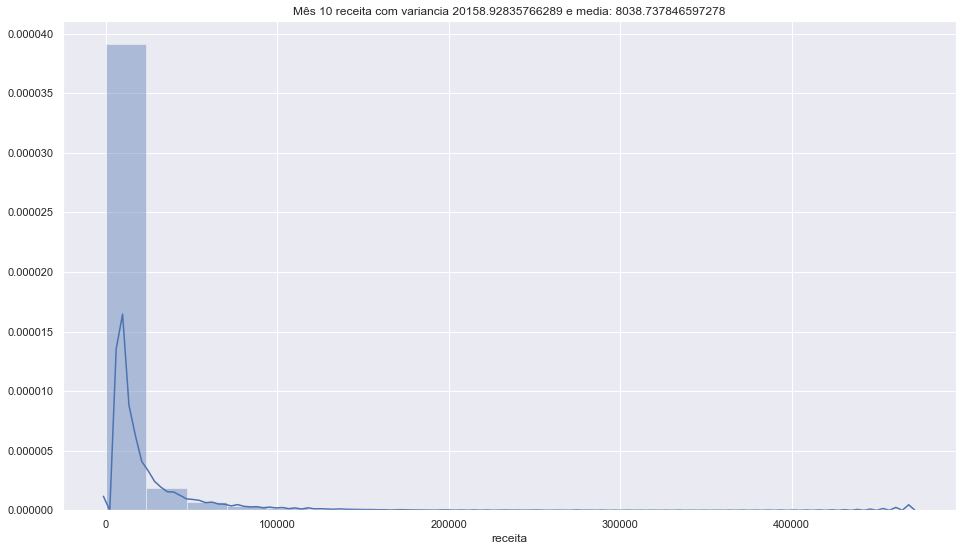

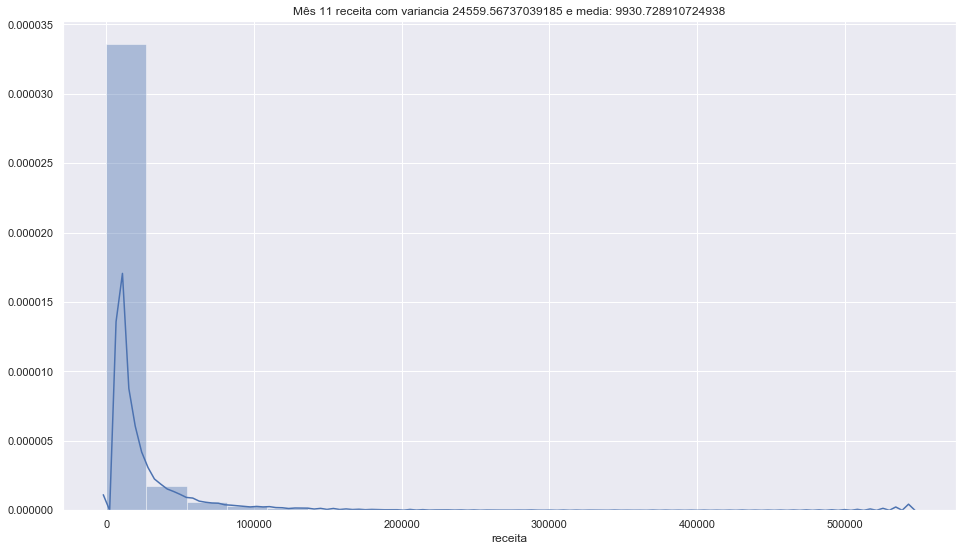

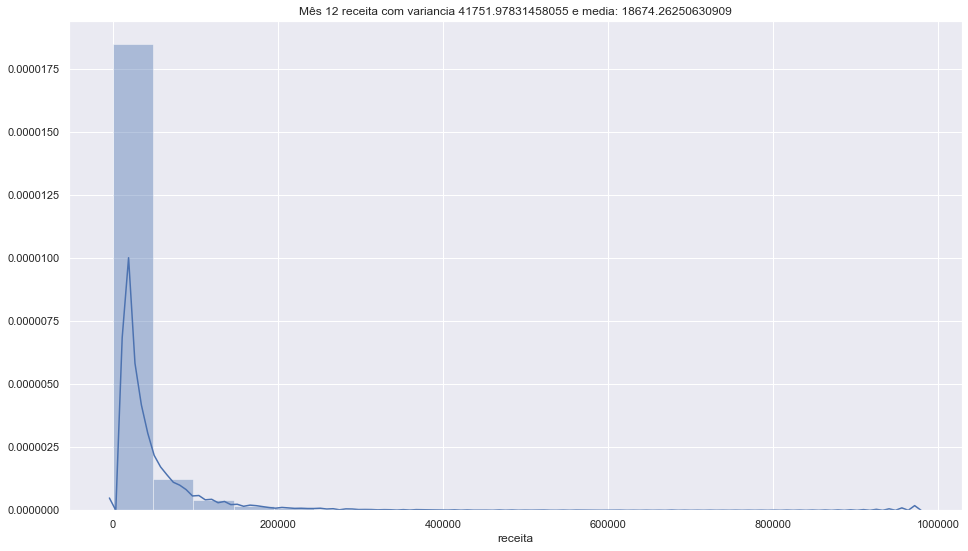

In [9]:
for i in range(12):
    plt.figure(figsize=(16,9))
    plt.title(f'Mês {i+1} receita com variancia {df[df["datetime"].dt.month == i+1]["receita"].std()} e media: {df[df["datetime"].dt.month == i+1]["receita"].mean()}')
    sns.distplot(df[df["datetime"].dt.month == i+1]["receita"], bins=20)
    plt.show()

## Analisando um loja em especifico

In [10]:
loja_1_df = df[df["cod_loja"] == 1]
loja_1_df.head()

,cod_loja,categoria,qtde,receita,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,datetime
0,1,CATEG_01,301.0,9164.86,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
1,1,CATEG_01,187.0,8175.55,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-01
2,1,CATEG_01,242.0,10521.67,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-01
3,1,CATEG_01,104.0,4560.91,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-01
4,1,CATEG_01,100.0,4263.30,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-01


In [11]:
loja_1_df.shape

(330, 25)

In [12]:
loja_1_df["categoria"].unique()

array(['CATEG_01', 'CATEG_02', 'CATEG_03', 'CATEG_04', 'CATEG_05',
       'CATEG_06', 'CATEG_07', 'CATEG_08', 'CATEG_09', 'CATEG_10',
       'CATEG_11', 'CATEG_12', 'CATEG_13', 'CATEG_14'], dtype=object)

In [13]:
lojas_1_mes_1_df = loja_1_df[(loja_1_df["datetime"].dt.month == 1) & (loja_1_df["datetime"].dt.year == 2016)]
lojas_1_mes_1_df["categoria"].unique()

array(['CATEG_01', 'CATEG_02', 'CATEG_03', 'CATEG_04', 'CATEG_05',
       'CATEG_06', 'CATEG_07', 'CATEG_08', 'CATEG_09', 'CATEG_10',
       'CATEG_11', 'CATEG_12', 'CATEG_13', 'CATEG_14'], dtype=object)

In [14]:
loja_1_df[loja_1_df["datetime"].dt.month == 2]["categoria"].unique()

array(['CATEG_01', 'CATEG_02', 'CATEG_03', 'CATEG_04', 'CATEG_05',
       'CATEG_06', 'CATEG_07', 'CATEG_08', 'CATEG_09', 'CATEG_10',
       'CATEG_11', 'CATEG_12', 'CATEG_13', 'CATEG_14'], dtype=object)

In [15]:
lojas_1_mes_1_df[["categoria", "receita", "qtde"]].groupby("categoria", as_index=False).sum()

,categoria,receita,qtde
0,CATEG_01,9164.86,301.0
1,CATEG_02,2563.29,137.0
2,CATEG_03,25973.47,1469.0
3,CATEG_04,5242.68,251.0
4,CATEG_05,35711.78,1155.0
5,CATEG_06,17438.52,550.0
6,CATEG_07,18159.82,1424.0
7,CATEG_08,6315.65,139.0
8,CATEG_09,43181.38,1357.0
9,CATEG_10,9107.28,273.0


In [16]:
lojas_1_mes_1_df["receita"].sum()

441833.37

In [17]:
lojas_1_mes_1_df["qtde"].sum()

13034.0

### Agrupando por loja e mes do ano

In [18]:
faturamento_df = df[["cod_loja", "categoria", "qtde", "receita", "datetime"]]
faturamento_df.head()

,cod_loja,categoria,qtde,receita,datetime
0,1,CATEG_01,301.0,9164.86,2016-01-01
1,1,CATEG_01,187.0,8175.55,2016-02-01
2,1,CATEG_01,242.0,10521.67,2016-03-01
3,1,CATEG_01,104.0,4560.91,2016-04-01
4,1,CATEG_01,100.0,4263.30,2016-05-01


In [19]:
faturamento_por_mes_df = faturamento_df.groupby(["cod_loja", "datetime"] , as_index=False).sum()

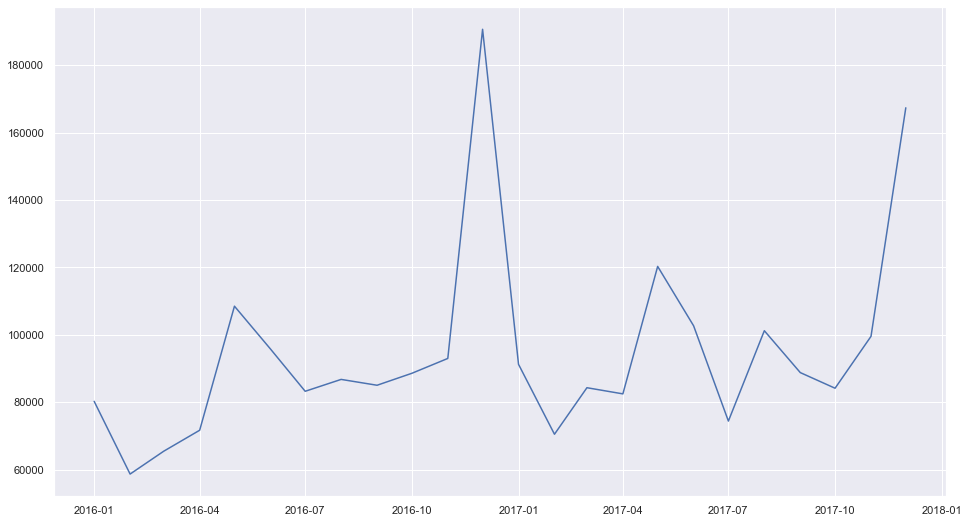

In [20]:
cod_loja = np.random.choice(faturamento_por_mes_df["cod_loja"].values)
t = faturamento_por_mes_df[faturamento_por_mes_df["cod_loja"] == cod_loja]

plt.figure(figsize=(16,9))
plt.plot(t["datetime"], t["receita"])
plt.show()

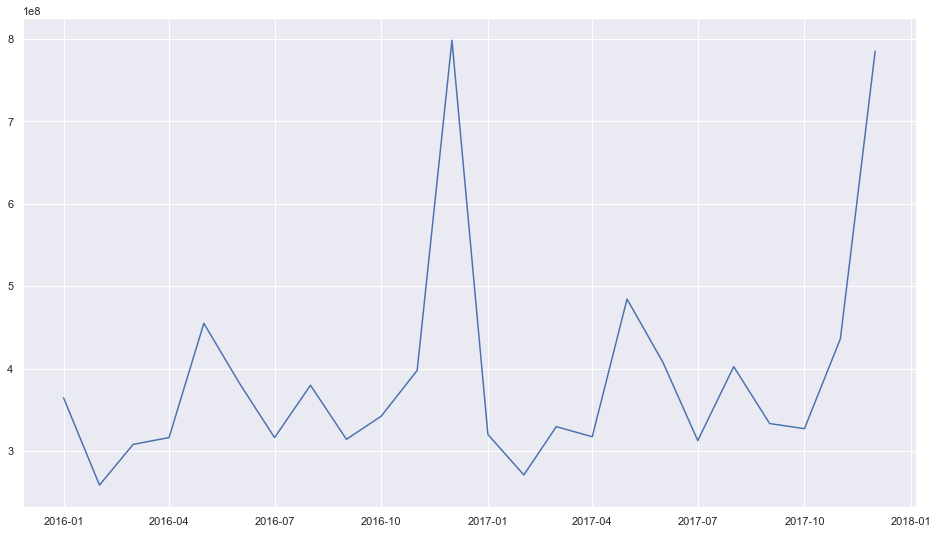

In [21]:
t = faturamento_por_mes_df.groupby("datetime", as_index=False).sum()

plt.figure(figsize=(16,9))
plt.plot(t["datetime"], t["receita"])
plt.show()

## Quantas categorias cada loja tem

In [22]:
faturamento_por_loja_gb = df.groupby(["cod_loja", "datetime"])

qtd_categorias = []
for i, _fat_df in faturamento_por_loja_gb:
    qtd_categorias.append(len(_fat_df["categoria"].unique()))

In [23]:
np.mean(qtd_categorias), np.std(qtd_categorias)

(13.62085166476563, 0.6283826519399273)

In [24]:
faturamento_df.head()

,cod_loja,categoria,qtde,receita,datetime
0,1,CATEG_01,301.0,9164.86,2016-01-01
1,1,CATEG_01,187.0,8175.55,2016-02-01
2,1,CATEG_01,242.0,10521.67,2016-03-01
3,1,CATEG_01,104.0,4560.91,2016-04-01
4,1,CATEG_01,100.0,4263.30,2016-05-01


## montar o faturamento sem a categoria

In [25]:
df = faturamento_por_mes_df.merge(lojas_df, on="cod_loja")
df.head()

,cod_loja,datetime,qtde,receita,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,...,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
0,1,2016-01-01,13034.0,441833.37,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016-02-01,11411.0,395340.22,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2016-03-01,15030.0,587810.18,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2016-04-01,12726.0,534618.84,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2016-05-01,13978.0,595477.92,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.shape[0]/24

3068.5

In [27]:
len(df["cod_loja"].unique())

3130

In [28]:
lojas_sem_24_meses = []
for i in df["cod_loja"].unique():
    if df[df["cod_loja"] == i].shape[0] != 24:
        lojas_sem_24_meses.append(i)
    
str(len(lojas_sem_24_meses)) + " lojas sem 24 meses de dado"

'167 lojas sem 24 meses de dado'

In [29]:
df[df["cod_loja"] == np.random.choice(lojas_sem_24_meses)]

,cod_loja,datetime,qtde,receita,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,...,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
67342,3328,2016-01-01,5304.0,191478.10,2103505003001,2103505,FEATURE_01_VALUE_10,FEATURE_02_VALUE_03,False,52.5,...,8.446996,4.966723,NaN,NaN,96.2,82.5,0.0,100.0,95.4,91.4
67343,3328,2016-02-01,2651.0,99210.76,2103505003001,2103505,FEATURE_01_VALUE_10,FEATURE_02_VALUE_03,False,52.5,...,8.446996,4.966723,NaN,NaN,96.2,82.5,0.0,100.0,95.4,91.4
67344,3328,2016-03-01,2205.0,104634.15,2103505003001,2103505,FEATURE_01_VALUE_10,FEATURE_02_VALUE_03,False,52.5,...,8.446996,4.966723,NaN,NaN,96.2,82.5,0.0,100.0,95.4,91.4
67345,3328,2016-04-01,1692.0,79815.63,2103505003001,2103505,FEATURE_01_VALUE_10,FEATURE_02_VALUE_03,False,52.5,...,8.446996,4.966723,NaN,NaN,96.2,82.5,0.0,100.0,95.4,91.4
67346,3328,2016-05-01,2091.0,106427.53,2103505003001,2103505,FEATURE_01_VALUE_10,FEATURE_02_VALUE_03,False,52.5,...,8.446996,4.966723,NaN,NaN,96.2,82.5,0.0,100.0,95.4,91.4
67347,3328,2016-06-01,2388.0,101048.65,2103505003001,2103505,FEATURE_01_VALUE_10,FEATURE_02_VALUE_03,False,52.5,...,8.446996,4.966723,NaN,NaN,96.2,82.5,0.0,100.0,95.4,91.4
67348,3328,2016-07-01,1431.0,76251.50,2103505003001,2103505,FEATURE_01_VALUE_10,FEATURE_02_VALUE_03,False,52.5,...,8.446996,4.966723,NaN,NaN,96.2,82.5,0.0,100.0,95.4,91.4
67349,3328,2016-08-01,1243.0,73230.61,2103505003001,2103505,FEATURE_01_VALUE_10,FEATURE_02_VALUE_03,False,52.5,...,8.446996,4.966723,NaN,NaN,96.2,82.5,0.0,100.0,95.4,91.4
67350,3328,2016-12-01,4694.0,279234.08,2103505003001,2103505,FEATURE_01_VALUE_10,FEATURE_02_VALUE_03,False,52.5,...,8.446996,4.966723,NaN,NaN,96.2,82.5,0.0,100.0,95.4,91.4
67351,3328,2017-01-01,1517.0,78360.72,2103505003001,2103505,FEATURE_01_VALUE_10,FEATURE_02_VALUE_03,False,52.5,...,8.446996,4.966723,NaN,NaN,96.2,82.5,0.0,100.0,95.4,91.4


In [30]:
faturamento_df[faturamento_df["cod_loja"] == 3474].head(50)

,cod_loja,categoria,qtde,receita,datetime
951716,3474,CATEG_01,1.0,70.0,2017-12-01
951717,3474,CATEG_04,4.0,153.6,2017-12-01
951718,3474,CATEG_05,21.0,994.9,2017-12-01
951719,3474,CATEG_07,8.0,193.2,2017-12-01
951720,3474,CATEG_08,1.0,47.9,2017-12-01
951721,3474,CATEG_09,9.0,226.1,2017-12-01
951722,3474,CATEG_10,3.0,110.7,2017-12-01
951723,3474,CATEG_11,68.0,6707.0,2017-12-01
951724,3474,CATEG_12,36.0,697.4,2017-12-01
951725,3474,CATEG_14,1.0,1.9,2017-12-01


In [31]:
faturamento_df[faturamento_df["cod_loja"] == 1338].head(50)

,cod_loja,categoria,qtde,receita,datetime
377486,1338,CATEG_01,46.0,1517.70,2016-01-01
377487,1338,CATEG_01,3.0,87.97,2016-05-01
377488,1338,CATEG_01,10.0,333.90,2016-06-01
377489,1338,CATEG_01,17.0,448.85,2016-07-01
377490,1338,CATEG_01,9.0,301.91,2016-08-01
377491,1338,CATEG_01,4.0,104.96,2016-09-01
377492,1338,CATEG_01,4.0,146.69,2016-10-01
377493,1338,CATEG_01,8.0,277.92,2016-11-01
377494,1338,CATEG_01,8.0,181.92,2016-12-01
377495,1338,CATEG_01,8.0,227.29,2017-01-01


Há 167 lojas sem dados dois anos

In [32]:
df = df[~df["cod_loja"].isin(lojas_sem_24_meses).values]
df.shape[0]/24, len(df["cod_loja"].unique())

(2963.0, 2963)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71112 entries, 0 to 73643
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cod_loja       71112 non-null  int64         
 1   datetime       71112 non-null  datetime64[ns]
 2   qtde           71112 non-null  float64       
 3   receita        71112 non-null  float64       
 4   cod_ap         71112 non-null  int64         
 5   cod_municipio  71112 non-null  int64         
 6   feature_01     25440 non-null  object        
 7   feature_02     71112 non-null  object        
 8   feature_03     71112 non-null  bool          
 9   feature_04     71112 non-null  float64       
 10  feature_05     71112 non-null  object        
 11  feature_06     71112 non-null  int64         
 12  feature_07     71112 non-null  float64       
 13  feature_08     71112 non-null  float64       
 14  feature_09     71112 non-null  float64       
 15  feature_10     7111

In [34]:
np.corrcoef(df["qtde"], df["receita"])

array([[1.        , 0.98289615],
       [0.98289615, 1.        ]])

esperada correlação entre qtde e receita. provavel memory leakage

In [74]:
c = ["cod_loja", "datetime", "qtde", "receita", \
     "feature_04", "feature_07", 'feature_08', 'feature_09', 'feature_10']
model_df = df.loc[:, c]
model_df["month"] = model_df["datetime"].dt.month
model_df["quarter"] = model_df["datetime"].dt.quarter
model_df["year"] = model_df["datetime"].dt.year
model_df.head()

,cod_loja,datetime,qtde,receita,feature_04,feature_07,feature_08,feature_09,feature_10,month,quarter,year
0,1,2016-01-01,13034.0,441833.37,21.76,0.168922,0.167659,115.958848,2.349821,1,1,2016
1,1,2016-02-01,11411.0,395340.22,21.76,0.168922,0.167659,115.958848,2.349821,2,1,2016
2,1,2016-03-01,15030.0,587810.18,21.76,0.168922,0.167659,115.958848,2.349821,3,1,2016
3,1,2016-04-01,12726.0,534618.84,21.76,0.168922,0.167659,115.958848,2.349821,4,2,2016
4,1,2016-05-01,13978.0,595477.92,21.76,0.168922,0.167659,115.958848,2.349821,5,2,2016


In [75]:
train_df = model_df[~model_df["datetime"].isin([date(2017,10,1), date(2017,11,1), date(2017,12,1)])]
test_df = model_df[model_df["datetime"].isin([date(2017,10,1), date(2017,11,1), date(2017,12,1)])]

In [76]:
colunas_treino = ["cod_loja", "month", "feature_04", 'feature_07', "feature_08", "feature_09", "feature_10", "quarter", "year"]
X_train = train_df[colunas_treino]
y_train = train_df["receita"]

X_test = test_df[["cod_loja", "qtde", "month", "datetime", "feature_04", 'feature_07', "feature_08", "feature_09", "feature_10", "quarter", "year"]]
y_test = test_df["receita"]

In [78]:
rf = RandomForestRegressor()
rf.fit(X_train.values, y_train.values)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## para uma loja especifica

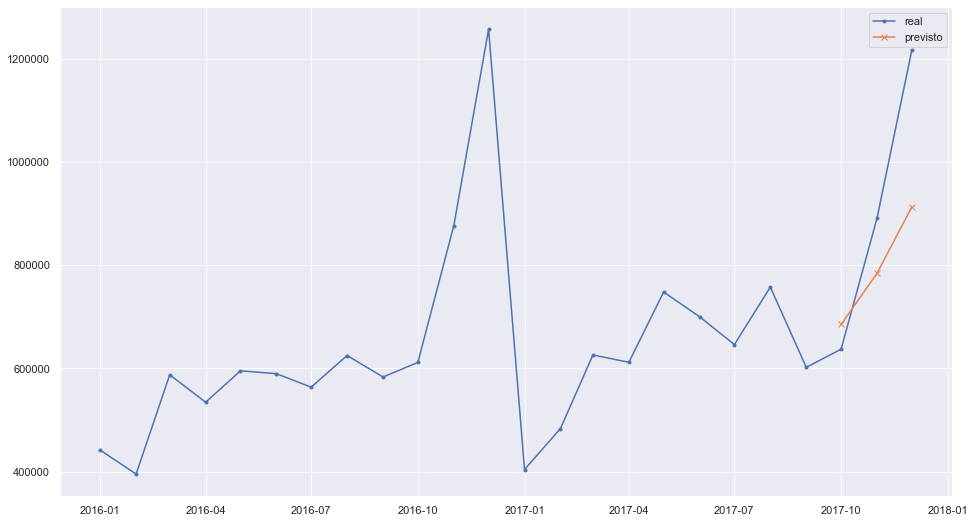

In [79]:
t = model_df[model_df["cod_loja"] == 1]

X = X_test[X_test["cod_loja"] == 1]
y_pred = rf.predict(X[colunas_treino])
plt.figure(figsize=(16,9))
plt.plot(t["datetime"], t["receita"], label="real", marker=".")
plt.plot(X["datetime"], y_pred, label="previsto", marker="x")
plt.legend()
plt.show()

879, 1643, 3194

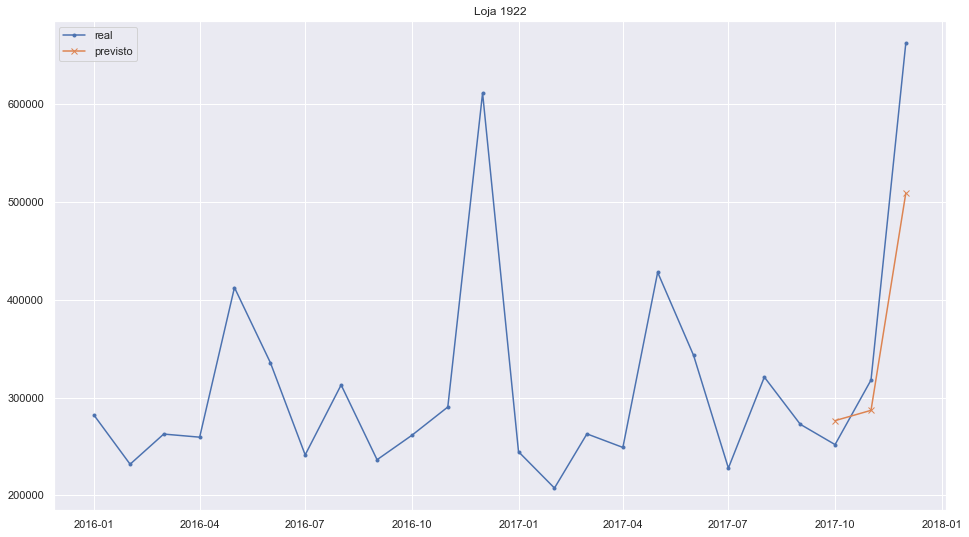

In [80]:
cod_loja = np.random.choice(model_df["cod_loja"].unique())
t = model_df[model_df["cod_loja"] == cod_loja]

X = X_test[X_test["cod_loja"] == cod_loja]
y_pred = rf.predict(X[colunas_treino])
plt.figure(figsize=(16,9))
plt.title("Loja {}".format(cod_loja))
plt.plot(t["datetime"], t["receita"], label="real", marker=".")
plt.plot(X["datetime"], y_pred, label="previsto", marker="x")
plt.legend()
plt.show()

In [81]:
y_pred = rf.predict(X_test[colunas_treino])
m = np.sqrt(mean_squared_error(y_test, y_pred))
r = r2_score(y_test, y_pred)
m, r

(39619.26489184724, 0.9404331372486687)

In [83]:
np.sqrt(13873624101)

117786.34938310976

In [84]:
m/np.sqrt(13873624101) # baseline atual

0.33636550499567935

In [85]:
m/np.sqrt(103330657616) # baseline atual2

0.12325138736915185

## xgboost

In [46]:
!pip install xgboost

In [47]:
import xgboost as xgb

In [68]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test[colunas_treino], y_test)

param = {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'eta': 0.9, 'booster':'gbtree'}
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 20
bst = xgb.train(param, dtrain, num_round, watchlist)

# this is prediction
preds = bst.predict(dtest)

[0]	eval-rmse:96998.92188	train-rmse:68449.95312
[1]	eval-rmse:91806.78906	train-rmse:62990.99609
[2]	eval-rmse:86583.14844	train-rmse:58301.70312
[3]	eval-rmse:84718.99219	train-rmse:56572.79297
[4]	eval-rmse:81499.40625	train-rmse:53742.56250
[5]	eval-rmse:80264.71875	train-rmse:53004.62500
[6]	eval-rmse:78995.34375	train-rmse:51630.00781
[7]	eval-rmse:78074.57031	train-rmse:50675.88281
[8]	eval-rmse:77133.75000	train-rmse:49850.17578
[9]	eval-rmse:75627.64844	train-rmse:48390.83203
[10]	eval-rmse:74882.88281	train-rmse:47528.04688
[11]	eval-rmse:73564.35156	train-rmse:46228.54688
[12]	eval-rmse:72457.47656	train-rmse:45408.83594
[13]	eval-rmse:70706.75000	train-rmse:43773.91797
[14]	eval-rmse:70006.96875	train-rmse:43106.51953
[15]	eval-rmse:68741.20312	train-rmse:41963.48438
[16]	eval-rmse:68113.68750	train-rmse:41436.07812
[17]	eval-rmse:66526.13281	train-rmse:40170.68750
[18]	eval-rmse:64805.70703	train-rmse:38919.82812
[19]	eval-rmse:64404.82422	train-rmse:38370.90234
